Math with Python Week 1 Assignment - Xhulia Turkaj

Chapter One - Challenge 1

Try writing an “even-odd vending machine,” which will take a number as input and do two things:
1. Print whether the number is even or odd.
2. Display the number followed by the next 9 even or odd numbers.
If the input is 2, the program should print even and then print 2, 4, 6,
8, 10, 12, 14, 16, 18, 20. Similarly, if the input is 1, the program should print odd and then print 1, 3, 5, 7, 9, 11, 13, 15, 17, 19.

Your program should use the is_integer() method to display an error message if the input is a number with significant digits beyond the decimal point.

In [39]:
num = input("Enter a number: ")

if num.isdigit():
    num = int(num)
    if num % 2 == 0:
        print("The number", num, "is an even number ", end="")
        numbers = ', '.join(str(i) for i in range(num + 2, num + 20, 2))
        print("and so are the following nine numbers:", numbers, end=".")
    else:
        print("The number", num, "is an odd number ", end="")
        numbers = ', '.join(str(i) for i in range(num + 1, num + 19, 2))
        print("and so are the following nine numbers:", numbers, end=".")
else:
    print("Error: Input must be an integer.")



Enter a number: 10
The number 10 is an even number and so are the following nine numbers: 12, 14, 16, 18, 20, 22, 24, 26, 28.

Chapter Two - Challenge 2

Explore a quadratic function visually

For the function y = x2 + 2x + 1 enhance the program to create a graph of the function. Use at least 10 values for x. Calculate the corresponding y values using the function and then create a graph using these two sets of values.
Once you’ve created the graph, spend some time analyzing how the value of y varies with respect to x. Is the variation linear or nonlinear?



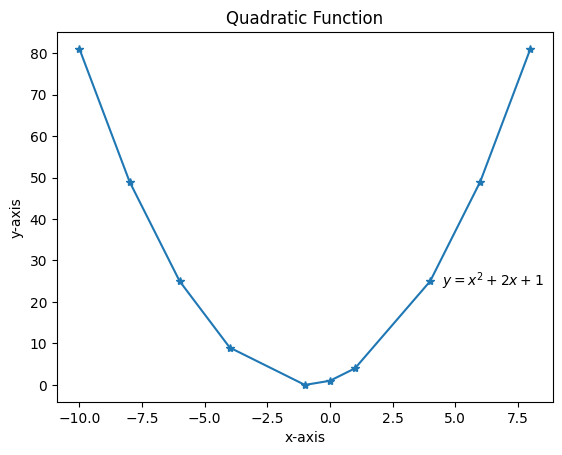

In [83]:
import matplotlib.pyplot as plt

def quad_func_calc():
    x_values = [-10, -8, -6, -4, -1, 0, 1, 4, 6, 8]
    y_values = [x**2 + x * 2 + 1 for x in x_values]
    draw_graph(x_values, y_values)

def draw_graph(x, y):
    plt.plot(x, y, marker='*')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.title('Quadratic Function')
    equation = r'$y = x^2 + 2x + 1$'
    plt.text(6.5, 24, equation, fontsize=10, ha='center')

quad_func_calc()
plt.show()


Text Answer for challenge 2 chapter 2

The variation of y with respect to x for the function above is nonlinear because the quadratic term of the equation contributes to the shape of the graph being a parabola. In other words,s a small change in x results in a significant change in y.

Chapter Three - Challenge 2

Implement a statistics calculator that takes a list of numbers in the file mydata.txt and then calculates and prints their mean, median, mode, variance, and standard deviation using the functions we wrote earlier in this chapter.

In [84]:
from google.colab import files

uploaded = files.upload()


Saving mydata.txt to mydata.txt


In [109]:
from collections import Counter

def read_data(filename):
    numbers = []
    with open(filename) as f:
        for line in f:
            numbers.append(float(line))

    return numbers

data = read_data('mydata.txt')
print(data)



[3.0, 9.0, 78.0, 34.0, 67.0, 47.0, 23.0, 45.0, 8.0, 8.0, 2.0, 2.0, 2.0, 75.0, 34.0, 90.0, 10.0, 3.0, 7.0, 9.0, 43.0, 9.0, 5.0, 6.0, 7.0, 78.0, 85.0, 32.0, 40.0, 30.0, 20.0, 10.0]


In [111]:
# mean

def calculate_mean(numbers):
    s = sum(numbers)
    N = len(numbers)
    mean = s/N
    return mean

# median
def calculate_median(numbers):
    N = len(numbers)
    numbers.sort()

    if N % 2 == 0:
        m1 = N // 2
        m2 = m1 + 1
        m1 -= 1
        m2 -= 1
        median = (numbers[m1] + numbers[m2]) / 2
    else:
        m = (N + 1) // 2
        m -= 1
        median = numbers[m]

    return median

# mode


def calculate_mode(numbers):
    c = Counter(numbers)
    numbers_freq = c.most_common()
    max_count = numbers_freq[0][1]
    modes = []
    for num in numbers_freq:
        if num[1] == max_count:
            modes.append(num[0])
    return modes



#variance


def find_differences(numbers):
    # Find the mean
    mean = calculate_mean(numbers)
    # Find the differences from the mean
    diff = []
    for num in numbers:
        diff.append(num - mean)

    return diff


def calculate_variance(numbers):
    # Find the list of differences
    diff = find_differences(numbers)
    # Find the squared differences
    squared_diff = []

    for d in diff:
        squared_diff.append(d**2)
    # Find the variance
    sum_squared_diff = sum(squared_diff)

    variance = sum_squared_diff / len(numbers)

    return variance




if __name__ == '__main__':
    data = read_data('mydata.txt')
    mean = calculate_mean(data)
    median = calculate_median(data)
    mode = calculate_mode(data)
    variance = calculate_variance(data)
    std_ev = variance**0.5
    print('Mean: {0}, Median {1}, Mode {2}'.format(mean, median, mode))
    print('Variance: {0}, Standard Deviation: {1}'.format(variance, std_ev))







Mean: 28.78125, Median 15.0, Mode [2.0, 9.0]
Variance: 772.1083984375, Standard Deviation: 27.78683858299645


Chapter Four - Challenge 4  

Solving Single-Variable Inequalities

For this challenge, create a function, isolve(), that will take any inequality, solve it, and then return the solution.


In [32]:
import sympy as sym
from IPython.display import display, Math

def input_and_solve():
    inequality_str = input("Enter an inequality: ")
    expression = sym.sympify(inequality_str)

    if isinstance(expression, sym.core.relational.Relational):
        isolve(expression)
    elif isinstance(expression, sym.polys.polytools.Poly):
        p = to_poly(expression)
        rel = expression.rel_op
        sol = sym.solve_poly_inequality(p, rel)
        display(Math("%s \;\; \Rightarrow \;\; %s"  %(sym.latex(expression), sym.latex(sol))))
    else:
        sim = sym.simplify(expression)
        sol = sym.solve(sim, x)
        display(Math("%s \;\; \Rightarrow \;\; %s \;\; \Rightarrow \;\; %s"  %(sym.latex(expression), sym.latex(sim), sym.latex(sol))))

def to_poly(exp):
    lhs = exp.lhs
    p = sym.Poly(lhs, x)
    return p


input_and_solve()


Enter an inequality: (2/x)+3>3


<IPython.core.display.Math object>

Chapter Five -  Challenge 2

According to the law of large numbers, the average value of results over multiple trials approaches the expected value as the number of trials increases. Your challenge in this task is to verify this law when rolling a six-sided die for the following number of trials: 100, 1000, 10000, 100000, and 500000.

In [35]:
import random


def roll_die(tosses):
    sum = 0
    for toss in range(tosses):
        sum += random.randint(1, 6)
    return sum / tosses


if __name__ == '__main__':
    trials = [100, 1000, 10000, 10000, 100000, 500000]
    print('Expected value: 3.5')
    for trial in trials:
        avg = roll_die(trial)
        print('Trials: {0} Trial average {1}'.format(trial, avg))

Expected value: 3.5
Trials: 100 Trial average 3.41
Trials: 1000 Trial average 3.567
Trials: 10000 Trial average 3.4785
Trials: 10000 Trial average 3.5023
Trials: 100000 Trial average 3.49335
Trials: 500000 Trial average 3.498596


Chapter 7 - Challenge 2
Implement the Gradient Descent

Enter a function in one variable: 2*x**2+5*x
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: -1
x: -1.24750137716973
Minimum value: -3.12498751376790


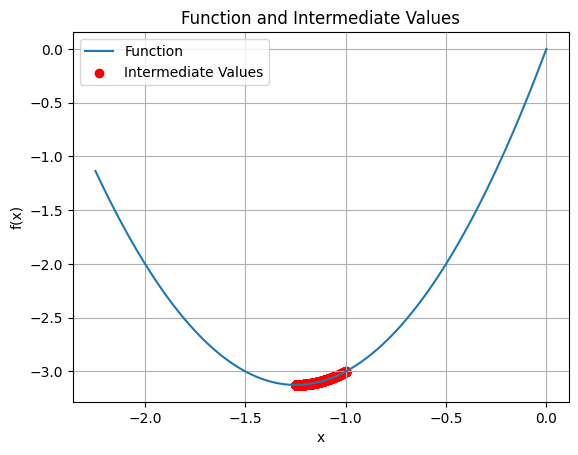

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Derivative, Symbol, sympify
from sympy.core.sympify import SympifyError

def grad_descent(x0, f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
    x_vals = [x_old]

    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old - step_size * f1x.subs({x: x_old}).evalf()
        x_vals.append(x_old)

    return x_new, x_vals

def plot_function(f, var, var_vals):
    var_vals = [float(val) for val in var_vals]

    x = np.linspace(min(var_vals) - 1, max(var_vals) + 1, 400)
    y = [f.subs({var: val}).evalf() for val in x]

    plt.plot(x, y, label='Function')
    plt.scatter(var_vals, [f.subs({var: val}).evalf() for val in var_vals], color='red', label='Intermediate Values')
    plt.legend()
    plt.xlabel(str(var))
    plt.ylabel('f({})'.format(var))
    plt.title('Function and Intermediate Values')
    plt.grid(True)
    plt.show()

if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()

        var_min, var_vals = grad_descent(var0, d, var)
        print('{0}: {1}'.format(var.name, var_min))
        print('Minimum value: {0}'.format(f.subs({var: var_min}).evalf()))
        plot_function(f, var, var_vals)

